In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()

In [2]:
#讀取保單資料
policy_df = pd.read_csv('d:/pythondata/policy_0702.csv')
print("policy_df len:",len(policy_df))

policy_df len: 1747942


In [3]:
#讀取重複的資料
del_df = pd.read_csv('d:/pythondata/Exception/duplicate_policy.csv')
print("del_df len:",len(del_df))

del_df len: 198


In [4]:
policy_df = policy_df[~policy_df['Policy_Number'].isin(del_df.Policy_Number)]

In [5]:
policy_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1746995 entries, 0 to 1747941
Data columns (total 41 columns):
Policy_Number                                 object
Insured's_ID                                  object
Prior_Policy_Number                           object
Cancellation                                  object
Vehicle_identifier                            object
Vehicle_Make_and_Model1                       object
Vehicle_Make_and_Model2                       object
Manafactured_Year_and_Month                   int64
Engine_Displacement_(Cubic_Centimeter)        int64
Imported_or_Domestic_Car                      int64
Coding_of_Vehicle_Branding_&_Type             object
qpt                                           float64
fpt                                           object
Main_Insurance_Coverage_Group                 object
Insurance_Coverage                            object
Insured_Amount1                               int64
Insured_Amount2                           

In [6]:
#全部的欄位
all_cols = [ col for col in policy_df.columns]

In [7]:
#明細的欄位
detail_cols = ['Main_Insurance_Coverage_Group',
'Insurance_Coverage',
'Insured_Amount1',
'Insured_Amount2',
'Insured_Amount3',
'Coverage_Deductible_if_applied',
'Premium'
]

In [8]:
detail_cols_all = ['Policy_Number']
detail_cols_all.extend(detail_cols)
detail_cols_all

['Policy_Number',
 'Main_Insurance_Coverage_Group',
 'Insurance_Coverage',
 'Insured_Amount1',
 'Insured_Amount2',
 'Insured_Amount3',
 'Coverage_Deductible_if_applied',
 'Premium']

In [9]:
#主檔的欄位
master_cols = [ col for col in all_cols if col not in detail_cols]

In [10]:
#移除明細的欄位
policy_master = policy_df.drop(columns=detail_cols)

In [11]:
#將plicy中的細項保險類別的資料刪除,留下主明細的資料並distinct
policy_master.drop_duplicates(subset=master_cols, keep='first',inplace=True)
print("policy_master len:",len(policy_master))

policy_master len: 351075


In [17]:
#policy_master['ibirth'].isna().sum()

56268

In [18]:
#policy_master['dbirth'].isna().sum()

45212

In [32]:
#bir = policy_master[~policy_master['ibirth'].isna()]

In [12]:
policy_master['ibirthT'] = policy_master['ibirth'].fillna('00/0000')

In [13]:
policy_master['ibirthT'] = policy_master['ibirthT'].apply(lambda s: int(s[3:]))

In [14]:
ibir = policy_master.loc[policy_master['ibirthT'] != 0,'ibirthT']

In [15]:
ibir = ibir.apply(lambda s: 2016-s)

In [16]:
ibir_mean = 48

(array([1.1000e+01, 5.0160e+03, 4.4550e+04, 8.7043e+04, 8.4881e+04,
        5.0999e+04, 1.8851e+04, 3.0490e+03, 3.8100e+02, 2.6000e+01]),
 array([  9. ,  18.5,  28. ,  37.5,  47. ,  56.5,  66. ,  75.5,  85. ,
         94.5, 104. ]),
 <a list of 10 Patch objects>)

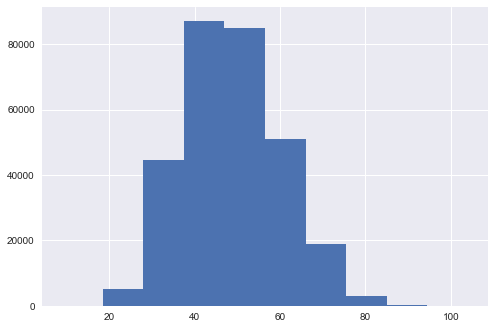

In [17]:
plt.hist(ibir)

In [18]:
policy_master.loc[policy_master['ibirthT'] != 0,'ibirthT'] = policy_master.loc[policy_master['ibirthT'] != 0,'ibirthT'].apply(lambda s: 2016-s)

In [19]:
policy_master.loc[policy_master['ibirthT'] == 0,'ibirthT']  = ibir_mean

In [20]:
policy_master['ibirthT'].describe()

count    351075.000000
mean         48.488557
std          10.343971
min           9.000000
25%          42.000000
50%          48.000000
75%          55.000000
max         104.000000
Name: ibirthT, dtype: float64

In [21]:
policy_master['ibirthT'].unique()

array([ 32,  41,  27,  53,  48,  38,  45,  65,  44,  49,  56,  43,  47,
        50,  46,  31,  68,  39,  55,  59,  42,  36,  35,  60,  52,  69,
        61,  66,  37,  29,  64,  51,  57,  62,  67,  79,  34,  40,  30,
        58,  28,  54,  71,  72,  77,  75,  33,  70,  63,  73,  74,  82,
        78,  86,  85,  26,  76,  23,  80,  81,  24,  88,  84,  83,  93,
        20,  90,  25,  22,  91,  94,  21,  13,  92,  87,  19,  97,  98,
        89,  95,  96, 101, 100,  99,  18,   9,  16, 104,  14], dtype=int64)

In [22]:
#計算各保險種類的保險金額
premium_df = policy_df.pivot_table(values=['Premium'], index='Policy_Number',columns='Insurance_Coverage',aggfunc='sum',fill_value=0)
premium_df.columns = premium_df.columns.levels[1]
premium_df['Policy_Number'] = premium_df.index
premium_df.head()

Insurance_Coverage,00I,01A,01J,02K,03L,04M,05E,05N,06F,07P,...,66C,66L,67D,68E,68N,70G,70P,71H,72@,Policy_Number
Policy_Number,,,,,,,,,,,,,,,,,,,,,
000061141b237e8619efedcd6939fddeff05b9a5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,000061141b237e8619efedcd6939fddeff05b9a5
0000d65ef9b4e9e5e9603617bd5fb8497b7f02b5,0,0,0,0,0,5352,80,661,0,0,...,0,0,0,0,0,0,0,0,0,0000d65ef9b4e9e5e9603617bd5fb8497b7f02b5
0001221abee6f59d6d40eeb1ba9ffa0f4f92b36b,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0001221abee6f59d6d40eeb1ba9ffa0f4f92b36b
000148bbf40f28bfc860c0d272aadc429e19e2d1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,000148bbf40f28bfc860c0d272aadc429e19e2d1
0001ad0ad0618f6d2e2c1875105adce6bcd77c2c,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0001ad0ad0618f6d2e2c1875105adce6bcd77c2c


In [23]:
pca_premium = premium_df.drop('Policy_Number',axis=1)

In [24]:
from sklearn.decomposition import PCA

In [25]:
pca = PCA(n_components=1)
pca.fit(pca_premium)
X_pca = pca.transform(pca_premium)
print("original shape:   ", pca_premium.shape)
print("transformed shape:", X_pca.shape)
premium_df['pca_premium'] = X_pca
premium_df.head()

original shape:    (351075, 60)
transformed shape: (351075, 1)


Insurance_Coverage,00I,01A,01J,02K,03L,04M,05E,05N,06F,07P,...,66L,67D,68E,68N,70G,70P,71H,72@,Policy_Number,pca_premium
Policy_Number,,,,,,,,,,,,,,,,,,,,,
000061141b237e8619efedcd6939fddeff05b9a5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,000061141b237e8619efedcd6939fddeff05b9a5,-794.375200
0000d65ef9b4e9e5e9603617bd5fb8497b7f02b5,0,0,0,0,0,5352,80,661,0,0,...,0,0,0,0,0,0,0,0,0000d65ef9b4e9e5e9603617bd5fb8497b7f02b5,-918.189743
0001221abee6f59d6d40eeb1ba9ffa0f4f92b36b,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0001221abee6f59d6d40eeb1ba9ffa0f4f92b36b,-782.460788
000148bbf40f28bfc860c0d272aadc429e19e2d1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,000148bbf40f28bfc860c0d272aadc429e19e2d1,-790.414401
0001ad0ad0618f6d2e2c1875105adce6bcd77c2c,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0001ad0ad0618f6d2e2c1875105adce6bcd77c2c,-788.492494


In [26]:
amount1_df = policy_df.pivot_table(values=['Insured_Amount1'], index='Policy_Number',columns='Insurance_Coverage',aggfunc='sum',fill_value=0)
amount1_df.columns = [x + "_1" for x in amount1_df.columns.levels[1]]
amount1_df['Policy_Number'] = amount1_df.index
amount1_df.head()

,00I_1,01A_1,01J_1,02K_1,03L_1,04M_1,05E_1,05N_1,06F_1,07P_1,...,66C_1,66L_1,67D_1,68E_1,68N_1,70G_1,70P_1,71H_1,72@_1,Policy_Number
Policy_Number,,,,,,,,,,,,,,,,,,,,,
000061141b237e8619efedcd6939fddeff05b9a5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,000061141b237e8619efedcd6939fddeff05b9a5
0000d65ef9b4e9e5e9603617bd5fb8497b7f02b5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0000d65ef9b4e9e5e9603617bd5fb8497b7f02b5
0001221abee6f59d6d40eeb1ba9ffa0f4f92b36b,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0001221abee6f59d6d40eeb1ba9ffa0f4f92b36b
000148bbf40f28bfc860c0d272aadc429e19e2d1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,000148bbf40f28bfc860c0d272aadc429e19e2d1
0001ad0ad0618f6d2e2c1875105adce6bcd77c2c,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0001ad0ad0618f6d2e2c1875105adce6bcd77c2c


In [27]:
pca_amount1 = amount1_df.drop('Policy_Number',axis=1)
pca1 = PCA(n_components=1)
pca1.fit(pca_amount1)
pca_a1 = pca1.transform(pca_amount1)
print("original shape:   ", pca_amount1.shape)
print("transformed shape:", pca_a1.shape)
amount1_df['pca_amount1'] = pca_a1
amount1_df.head()

original shape:    (351075, 60)
transformed shape: (351075, 1)


,00I_1,01A_1,01J_1,02K_1,03L_1,04M_1,05E_1,05N_1,06F_1,07P_1,...,66L_1,67D_1,68E_1,68N_1,70G_1,70P_1,71H_1,72@_1,Policy_Number,pca_amount1
Policy_Number,,,,,,,,,,,,,,,,,,,,,
000061141b237e8619efedcd6939fddeff05b9a5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,000061141b237e8619efedcd6939fddeff05b9a5,-1.675118e+06
0000d65ef9b4e9e5e9603617bd5fb8497b7f02b5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0000d65ef9b4e9e5e9603617bd5fb8497b7f02b5,-2.294334e+05
0001221abee6f59d6d40eeb1ba9ffa0f4f92b36b,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0001221abee6f59d6d40eeb1ba9ffa0f4f92b36b,7.354810e+05
000148bbf40f28bfc860c0d272aadc429e19e2d1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,000148bbf40f28bfc860c0d272aadc429e19e2d1,-1.192998e+06
0001ad0ad0618f6d2e2c1875105adce6bcd77c2c,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0001ad0ad0618f6d2e2c1875105adce6bcd77c2c,-1.192999e+06


In [28]:
amount2_df = policy_df.pivot_table(values=['Insured_Amount2'], index='Policy_Number',columns='Insurance_Coverage',aggfunc='sum',fill_value=0)
amount2_df.columns = [x + "_2" for x in amount2_df.columns.levels[1]]
amount2_df['Policy_Number'] = amount2_df.index
amount2_df.head()

,00I_2,01A_2,01J_2,02K_2,03L_2,04M_2,05E_2,05N_2,06F_2,07P_2,...,66C_2,66L_2,67D_2,68E_2,68N_2,70G_2,70P_2,71H_2,72@_2,Policy_Number
Policy_Number,,,,,,,,,,,,,,,,,,,,,
000061141b237e8619efedcd6939fddeff05b9a5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,000061141b237e8619efedcd6939fddeff05b9a5
0000d65ef9b4e9e5e9603617bd5fb8497b7f02b5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0000d65ef9b4e9e5e9603617bd5fb8497b7f02b5
0001221abee6f59d6d40eeb1ba9ffa0f4f92b36b,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0001221abee6f59d6d40eeb1ba9ffa0f4f92b36b
000148bbf40f28bfc860c0d272aadc429e19e2d1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,000148bbf40f28bfc860c0d272aadc429e19e2d1
0001ad0ad0618f6d2e2c1875105adce6bcd77c2c,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0001ad0ad0618f6d2e2c1875105adce6bcd77c2c


In [29]:
pca_amount2 = amount2_df.drop('Policy_Number',axis=1)
pca2 = PCA(n_components=1)
pca2.fit(pca_amount2)
pca_a2 = pca2.transform(pca_amount2)
print("original shape:   ", pca_amount2.shape)
print("transformed shape:", pca_a2.shape)
amount2_df['pca_amount2'] = pca_a2
amount2_df.head()

original shape:    (351075, 60)
transformed shape: (351075, 1)


,00I_2,01A_2,01J_2,02K_2,03L_2,04M_2,05E_2,05N_2,06F_2,07P_2,...,66L_2,67D_2,68E_2,68N_2,70G_2,70P_2,71H_2,72@_2,Policy_Number,pca_amount2
Policy_Number,,,,,,,,,,,,,,,,,,,,,
000061141b237e8619efedcd6939fddeff05b9a5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,000061141b237e8619efedcd6939fddeff05b9a5,-453941.614769
0000d65ef9b4e9e5e9603617bd5fb8497b7f02b5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0000d65ef9b4e9e5e9603617bd5fb8497b7f02b5,-456034.010545
0001221abee6f59d6d40eeb1ba9ffa0f4f92b36b,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0001221abee6f59d6d40eeb1ba9ffa0f4f92b36b,-453941.614769
000148bbf40f28bfc860c0d272aadc429e19e2d1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,000148bbf40f28bfc860c0d272aadc429e19e2d1,-453941.614769
0001ad0ad0618f6d2e2c1875105adce6bcd77c2c,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0001ad0ad0618f6d2e2c1875105adce6bcd77c2c,-453941.614769


In [30]:
amount3_df = policy_df.pivot_table(values=['Insured_Amount3'], index='Policy_Number',columns='Insurance_Coverage',aggfunc='sum',fill_value=0)
amount3_df.columns = [x + "_3" for x in amount3_df.columns.levels[1]]
amount3_df['Policy_Number'] = amount3_df.index
amount3_df.head()

,00I_3,01A_3,01J_3,02K_3,03L_3,04M_3,05E_3,05N_3,06F_3,07P_3,...,66C_3,66L_3,67D_3,68E_3,68N_3,70G_3,70P_3,71H_3,72@_3,Policy_Number
Policy_Number,,,,,,,,,,,,,,,,,,,,,
000061141b237e8619efedcd6939fddeff05b9a5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,000061141b237e8619efedcd6939fddeff05b9a5
0000d65ef9b4e9e5e9603617bd5fb8497b7f02b5,0,0,0,0,0,272000,272000,272000,0,0,...,0,0,0,0,0,0,0,0,0,0000d65ef9b4e9e5e9603617bd5fb8497b7f02b5
0001221abee6f59d6d40eeb1ba9ffa0f4f92b36b,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0001221abee6f59d6d40eeb1ba9ffa0f4f92b36b
000148bbf40f28bfc860c0d272aadc429e19e2d1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,000148bbf40f28bfc860c0d272aadc429e19e2d1
0001ad0ad0618f6d2e2c1875105adce6bcd77c2c,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0001ad0ad0618f6d2e2c1875105adce6bcd77c2c


In [31]:
pca_amount3 = amount3_df.drop('Policy_Number',axis=1)
pca3 = PCA(n_components=1)
pca3.fit(pca_amount3)
pca_a3 = pca3.transform(pca_amount3)
print("original shape:   ", pca_amount3.shape)
print("transformed shape:", pca_a3.shape)
amount3_df['pca_amount3'] = pca_a3
amount3_df.head()

original shape:    (351075, 60)
transformed shape: (351075, 1)


,00I_3,01A_3,01J_3,02K_3,03L_3,04M_3,05E_3,05N_3,06F_3,07P_3,...,66L_3,67D_3,68E_3,68N_3,70G_3,70P_3,71H_3,72@_3,Policy_Number,pca_amount3
Policy_Number,,,,,,,,,,,,,,,,,,,,,
000061141b237e8619efedcd6939fddeff05b9a5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,000061141b237e8619efedcd6939fddeff05b9a5,-1.558990e+07
0000d65ef9b4e9e5e9603617bd5fb8497b7f02b5,0,0,0,0,0,272000,272000,272000,0,0,...,0,0,0,0,0,0,0,0,0000d65ef9b4e9e5e9603617bd5fb8497b7f02b5,6.482246e+06
0001221abee6f59d6d40eeb1ba9ffa0f4f92b36b,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0001221abee6f59d6d40eeb1ba9ffa0f4f92b36b,-1.082842e+07
000148bbf40f28bfc860c0d272aadc429e19e2d1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,000148bbf40f28bfc860c0d272aadc429e19e2d1,-5.053522e+06
0001ad0ad0618f6d2e2c1875105adce6bcd77c2c,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0001ad0ad0618f6d2e2c1875105adce6bcd77c2c,-1.466659e+07


In [32]:
premium_df = premium_df[['Policy_Number','pca_premium']]
amount1_df = amount1_df[['Policy_Number','pca_amount1']]
amount2_df = amount2_df[['Policy_Number','pca_amount2']]
amount3_df = amount3_df[['Policy_Number','pca_amount3']]

In [33]:
#整理明細資料
policy_detail = policy_df.loc[:,detail_cols_all].copy()
print("policy_detail len:",len(policy_detail))

policy_detail len: 1746995


In [34]:
#計算該年度的保險金額
premium = policy_detail.pivot_table(values=['Premium'], index='Policy_Number',aggfunc='sum')
premium['Policy_Number'] = premium.index

In [35]:
#計算保險種類數
coverage = policy_detail.pivot_table(values='Insurance_Coverage', index='Policy_Number',aggfunc='count')
coverage['Policy_Number'] = coverage.index

In [36]:
from sklearn import preprocessing
labencoder = preprocessing.LabelEncoder()

In [37]:
#將廠牌名稱一  Coding_of_Vehicle_Branding_&_Type 廠牌車型代號
#m1 = policy_master['Vehicle_Make_and_Model1'].unique()
#m1_dit = { m1[i] : i+1 for i in range(0, len(m1) ) }
m1 = labencoder.fit_transform(policy_master['Vehicle_Make_and_Model1'])

In [38]:
#m2 = policy_master['Vehicle_Make_and_Model2'].unique()
#m2_dit = { m2[i] : i+1 for i in range(0, len(m2) ) }
m2 = labencoder.fit_transform(policy_master['Vehicle_Make_and_Model2'])

In [39]:
#m3 = policy_master['Coding_of_Vehicle_Branding_&_Type'].unique()
#m3_dit = { m3[i] : i+1 for i in range(0, len(m3) ) }
m3 = labencoder.fit_transform(policy_master['Coding_of_Vehicle_Branding_&_Type'])

In [40]:
#policy_master['model1'] = policy_master['Vehicle_Make_and_Model1'].map(m1_dit)
policy_master['model1'] = m1

In [41]:
policy_master['model1'].describe()

count    351075.000000
mean         86.685326
std          30.597984
min           0.000000
25%          75.000000
50%          77.000000
75%         113.000000
max         135.000000
Name: model1, dtype: float64

In [42]:
#policy_master['model2'] = policy_master['Vehicle_Make_and_Model2'].map(m2_dit)
policy_master['model2'] = m2

In [43]:
policy_master['model2'].describe()

count    351075.000000
mean       4007.972060
std        2304.318325
min           0.000000
25%        2062.000000
50%        4028.000000
75%        5966.000000
max        8111.000000
Name: model2, dtype: float64

In [44]:
#policy_master['brandtype'] = policy_master['Coding_of_Vehicle_Branding_&_Type'].map(m3_dit)
policy_master['brandtype'] = m3

In [45]:
policy_master['brandtype'].describe()

count    351075.000000
mean       3777.052533
std        2119.625615
min           0.000000
25%        2027.000000
50%        3771.000000
75%        5585.000000
max        7404.000000
Name: brandtype, dtype: float64

In [46]:
#m4 = policy_master['Distribution_Channel'].unique()
#m4_dit = { m4[i] : i+1 for i in range(0, len(m4) ) }
m4 = labencoder.fit_transform(policy_master['Distribution_Channel'])

In [47]:
#policy_master['channel'] = policy_master['Distribution_Channel'].map(m4_dit)
policy_master['channel'] = m4

In [48]:
policy_master['channel'].describe()

count    351075.000000
mean        272.992514
std         177.616883
min           0.000000
25%         194.000000
50%         194.000000
75%         262.000000
max         874.000000
Name: channel, dtype: float64

In [49]:
policy_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 351075 entries, 0 to 1747930
Data columns (total 39 columns):
Policy_Number                                 351075 non-null object
Insured's_ID                                  351075 non-null object
Prior_Policy_Number                           281770 non-null object
Cancellation                                  351075 non-null object
Vehicle_identifier                            351002 non-null object
Vehicle_Make_and_Model1                       351075 non-null object
Vehicle_Make_and_Model2                       351075 non-null object
Manafactured_Year_and_Month                   351075 non-null int64
Engine_Displacement_(Cubic_Centimeter)        351075 non-null int64
Imported_or_Domestic_Car                      351075 non-null int64
Coding_of_Vehicle_Branding_&_Type             351075 non-null object
qpt                                           351075 non-null float64
fpt                                           351075 non-null 

In [50]:
pca_fequipment = policy_master[['fequipment1','fequipment2','fequipment3','fequipment4','fequipment5','fequipment6','fequipment9']]

In [51]:
pca_fequipment.head()

,fequipment1,fequipment2,fequipment3,fequipment4,fequipment5,fequipment6,fequipment9
0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0


In [52]:
pca4 = PCA(n_components=1)
pca4.fit(pca_fequipment)
pca_a4 = pca4.transform(pca_fequipment)
print("original shape:   ", pca_fequipment.shape)
print("transformed shape:", pca_a4.shape)
policy_master['pca_fequipment'] = pca_a4
policy_master.head()

original shape:    (351075, 7)
transformed shape: (351075, 1)


,Policy_Number,Insured's_ID,Prior_Policy_Number,Cancellation,Vehicle_identifier,Vehicle_Make_and_Model1,Vehicle_Make_and_Model2,Manafactured_Year_and_Month,Engine_Displacement_(Cubic_Centimeter),Imported_or_Domestic_Car,...,fequipment5,fequipment6,fequipment9,nequipment9,ibirthT,model1,model2,brandtype,channel,pca_fequipment
0,79110176bf64b5094c19aad785aeac56e36cb609,Ae03a1ba75867f060504f8ee798d06275a5e5bb9c,e1379d9c360fe4a20027b8acc161ec93f2727e66,,a05c4dbcfc92d99e715441b9cd3fcab5ce117be5,7d1fedf43d62c640985e40c5628fea6d902c142b,566bb5a9ea0fa963636632a0d1754ea06da11c13,2010,1342,10,...,0,0,0,,32,59,2764,5426,262,-0.000015
2,61a449f6180b23379a584af904d7412205d8ff8c,J7697af29d66cb8a160fb68b1412ef06716ca4a57,a2f57eef440f29783da32b4e3708e0ea5b84b9c4,,6d30feebf8bf0e46af73cd2a1d0649d4f0f83f8a,9e1816a8c2a63b7f96a82ce6487b2d43222750db,de17c3df362a74aef9d15b1c95ff5cf7ff94f628,2006,1794,10,...,0,0,0,,41,77,7004,2240,262,-0.000015
4,1a1f5f582bf1ff23467352e8f2fd31acefddc654,Fcd3d3578e9ae55aa6140da432f69db2bd0c50fad,bd864927fc796b75c917ade554c0657d22b860bd,,3828f4a4c40ac91647919306d0de0d11043d89fe,de36049ef6a91e6dd1a031ab5501beca28cc3610,cca82bf061cfd670f460f9e4a1b9ca853378382b,2006,1341,10,...,0,0,0,,27,114,6468,7059,461,-0.000015
7,6b420a887376f4dce53e22e600f2ca56aadec0ee,P1cf232e92478ef7fd1aab3be9f94b3bfe812e422,872830c25ddf5ac8a050f25812bd7a14aa1eb9e5,,4450ffd7879ec507d2400f346466a9fbbb54d12a,7f913cfdeb239c0caed5fb6e4c8a6199ecb339fc,eeb2ced6b829daf594d1245fc322ef3cd9bb69dc,2002,2995,40,...,0,0,0,,53,62,7512,2467,386,-0.000015
8,15a5e6b7c385d23c01bf4eaa49f310d638d7d3d9,27a85951576aa3af5b9ed77f0015a2af9853488fe,9429254b6bc54ec448c6f7d664b00d04749034d6,,8a57375aeaee76be15a11544079e9b6c768a1d1a,7f913cfdeb239c0caed5fb6e4c8a6199ecb339fc,a2237ec5b04868622e576ed20bd7357a452a93d2,2001,2164,24,...,0,0,0,,48,62,5112,1371,731,-0.000015


In [53]:
#將保險金額與保險種類數,合併到主保單上
policy_master1 = pd.merge(policy_master,premium,left_on=['Policy_Number'],right_on=['Policy_Number'],how='inner')
policy_master2 = pd.merge(policy_master1,coverage,left_on=['Policy_Number'],right_on=['Policy_Number'],how='inner')

In [54]:
policy_master3 = pd.merge(policy_master2,premium_df,left_on=['Policy_Number'],right_on=['Policy_Number'],how='inner')

In [55]:
policy_master4 = pd.merge(policy_master3,amount1_df,left_on=['Policy_Number'],right_on=['Policy_Number'],how='inner')
policy_master5 = pd.merge(policy_master4,amount2_df,left_on=['Policy_Number'],right_on=['Policy_Number'],how='inner')
#policy_master6 = pd.merge(policy_master5,amount3_df,left_on=['Policy_Number'],right_on=['Policy_Number'],how='inner')

In [56]:
policy_master_merg = pd.merge(policy_master5,amount3_df,left_on=['Policy_Number'],right_on=['Policy_Number'],how='inner')
len(policy_master_merg)

351075

In [57]:
policy_master_merg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 351075 entries, 0 to 351074
Data columns (total 46 columns):
Policy_Number                                 351075 non-null object
Insured's_ID                                  351075 non-null object
Prior_Policy_Number                           281770 non-null object
Cancellation                                  351075 non-null object
Vehicle_identifier                            351002 non-null object
Vehicle_Make_and_Model1                       351075 non-null object
Vehicle_Make_and_Model2                       351075 non-null object
Manafactured_Year_and_Month                   351075 non-null int64
Engine_Displacement_(Cubic_Centimeter)        351075 non-null int64
Imported_or_Domestic_Car                      351075 non-null int64
Coding_of_Vehicle_Branding_&_Type             351075 non-null object
qpt                                           351075 non-null float64
fpt                                           351075 non-null o

In [58]:
claim_df = pd.read_csv('d:/pythondata/claim_0702.csv')
print("claim_df len:",len(claim_df))

claim_df len: 69613


In [59]:
#理賠金額
claim_df['Amount'] = claim_df['Paid_Loss_Amount'] + claim_df['paid_Expenses_Amount']
paid = claim_df.pivot_table(values=['Amount'], index='Policy_Number',aggfunc='sum')
paid['Policy_Number'] = paid.index

In [60]:
#理賠自負額
deductible = claim_df.pivot_table(values=['Deductible'], index='Policy_Number',aggfunc='sum')
deductible['Policy_Number'] = deductible.index

In [61]:
#理賠次數
claimcount = claim_df.pivot_table(values='Claim_Number', index='Policy_Number',aggfunc='count')
claimcount['Policy_Number'] = claimcount.index

In [62]:
claim1 = pd.merge(paid,deductible,left_on=['Policy_Number'],right_on=['Policy_Number'],how='inner')
claim_merg = pd.merge(claim1,claimcount,left_on=['Policy_Number'],right_on=['Policy_Number'],how='inner')

In [63]:
#將主檔與明細的資料整合
all_merg = pd.merge(policy_master_merg,claim_merg,left_on=['Policy_Number'],right_on=['Policy_Number'],how='left')
len(all_merg)

351075

In [64]:
#計算車子的年齡
all_merg['Car_Age'] = 2016-all_merg['Manafactured_Year_and_Month']
#處理na的值,轉成0
all_merg['Amount'] = all_merg['Amount'].fillna(0)
all_merg['Deductible'] = all_merg['Deductible'].fillna(0)
all_merg['Claim_Number'] = all_merg['Claim_Number'].fillna(0)
all_merg['fsex'] = all_merg['fsex'].fillna(0)
all_merg['fsex'] = all_merg.fsex.map({' ':0,'2':2 ,'1':1, 0:0})
all_merg['fmarriage'] = all_merg['fmarriage'].fillna(0)
all_merg['fmarriage'] = all_merg.fmarriage.map({' ':0,'2':2 ,'1':1, 0:0})
#all_merg['Prior_Policy_Number'].fillna(0)
#all_merg.loc[all_merg['Prior_Policy_Number'] != 0,'Prior_Policy_Number'] = 1
all_merg['Cancellation'] = all_merg.Cancellation.map({' ':0,'Y':1})

In [65]:
len(all_merg.loc[all_merg['Cancellation'] == 0] )

281772

In [66]:
train_df = pd.read_csv('d:/pythondata/training-set.csv')
print("train_df len:",len(train_df))

train_df len: 210763


In [67]:
train_df_merge = pd.merge(all_merg,train_df,left_on=['Policy_Number'],right_on=['Policy_Number'],how='inner')
print("train_df_merge len:",len(train_df_merge))

train_df_merge len: 210565


In [68]:
train_df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 210565 entries, 0 to 210564
Data columns (total 51 columns):
Policy_Number                                 210565 non-null object
Insured's_ID                                  210565 non-null object
Prior_Policy_Number                           170236 non-null object
Cancellation                                  210565 non-null int64
Vehicle_identifier                            210511 non-null object
Vehicle_Make_and_Model1                       210565 non-null object
Vehicle_Make_and_Model2                       210565 non-null object
Manafactured_Year_and_Month                   210565 non-null int64
Engine_Displacement_(Cubic_Centimeter)        210565 non-null int64
Imported_or_Domestic_Car                      210565 non-null int64
Coding_of_Vehicle_Branding_&_Type             210565 non-null object
qpt                                           210565 non-null float64
fpt                                           210565 non-null ob

In [69]:
train_df_merge.loc[train_df_merge['Next_Premium'] != 0,'NextYN'] = 1

In [70]:
train_df_merge['NextYN'] = train_df_merge['NextYN'].fillna(0)

In [71]:
train_df_merge['NextYN'].describe()

count    210565.000000
mean          0.780543
std           0.413880
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: NextYN, dtype: float64

In [113]:
#下年度保費 < 今年度的保額
len(train_df_merge[(train_df_merge['Premium'] > train_df_merge['Next_Premium'])])/len(train_df_merge)

0.656989528174198

In [114]:
#下年度保費 >= 今年度的保額
len(train_df_merge[(train_df_merge['Premium'] <= train_df_merge['Next_Premium'])])/len(train_df_merge)

0.343010471825802

In [115]:
#下年度保費沒續保的
len(train_df_merge[(train_df_merge['NextYN'] == 0)])/len(train_df_merge)

0.21945717474414075

In [72]:
#刪除不要的欄位
del_cols = [
'Policy_Number',
'Prior_Policy_Number',
'Insured\'s_ID',
'Vehicle_identifier',
'Vehicle_Make_and_Model1',
'Vehicle_Make_and_Model2',
'Coding_of_Vehicle_Branding_&_Type',
'Manafactured_Year_and_Month',
#'qpt',
'fpt',
'Distribution_Channel',
'ibirth',
#'fsex',
#'fmarriage',
'aassured_zip',
'iply_area',
'dbirth',
'nequipment9',
#=====
'Replacement_cost_of_insured_vehicle',
'fequipment1',
'fequipment2',
'fequipment3',
'fequipment4',
'fequipment5',
'fequipment6',
'fequipment9'
]
train_df_merge = train_df_merge.drop(del_cols,axis=1)


In [111]:
train_df_merge.head()

,Cancellation,Engine_Displacement_(Cubic_Centimeter),Imported_or_Domestic_Car,qpt,Multiple_Products_with_TmNewa_(Yes_or_No?),lia_class,plia_acc,pdmg_acc,fassured,fsex,...,pca_premium,pca_amount1,pca_amount2,pca_amount3,Amount,Deductible,Claim_Number,Car_Age,Next_Premium,NextYN
0,0,1342,10,5.0,0.0,3,-0.10,0.0,1,2,...,-774.633261,-2.287586e+05,-453941.614769,-6.975504e+06,0.0,0.0,0.0,6,2412,1.0
1,0,1794,10,5.0,0.0,1,-0.30,0.0,1,2,...,-766.494652,2.663960e+06,-453941.614769,4.109537e+07,0.0,0.0,0.0,10,3129,1.0
2,0,1341,10,5.0,0.0,6,0.30,0.0,1,2,...,-757.558691,-1.675118e+06,-453941.614769,-1.562852e+07,0.0,0.0,0.0,10,0,0.0
3,0,2995,40,5.0,0.0,4,0.00,0.0,1,1,...,-816.138899,-2.157913e+06,-456034.010545,-1.659736e+07,0.0,0.0,0.0,14,183,1.0
4,0,2164,24,5.0,0.0,0,-0.35,0.0,2,0,...,-788.114762,-2.157238e+06,-453941.614769,-1.659173e+07,0.0,0.0,0.0,15,0,0.0


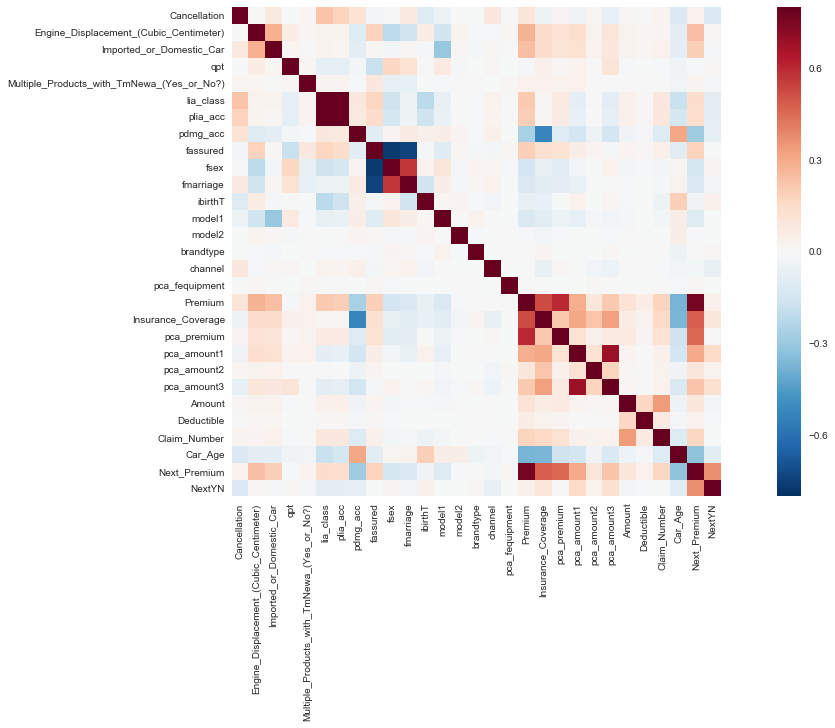

In [74]:
corrmat = train_df_merge.corr()
f, ax = plt.subplots(figsize=(20, 9))
sns.heatmap(corrmat, vmax=0.8, square=True)

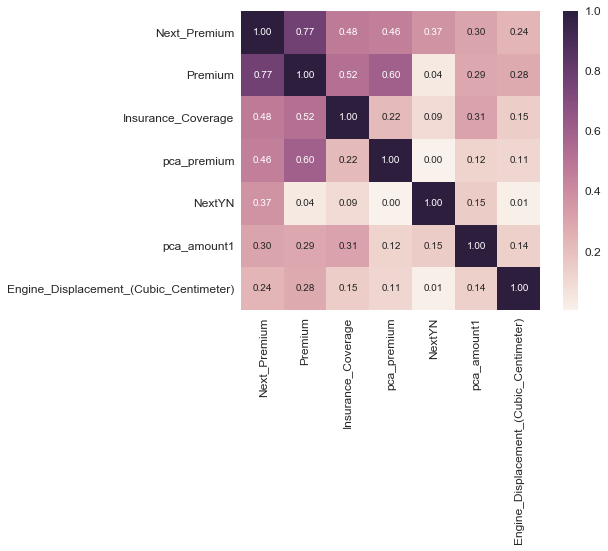

In [76]:
k  = 7 # 关系矩阵中将显示10个特征
cols = corrmat.nlargest(k, 'Next_Premium')['Next_Premium'].index
cm = np.corrcoef(train_df_merge[cols].values.T)
sns.set(font_scale=1.2)
hm = sns.heatmap(cm, cbar=True, annot=True, \
                 square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [77]:
cal_cols = cols.copy()

In [78]:
cal_cols = cal_cols.drop(['Next_Premium','NextYN'])

In [79]:
len(cal_cols)

5

In [80]:
train_df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 210565 entries, 0 to 210564
Data columns (total 29 columns):
Cancellation                                  210565 non-null int64
Engine_Displacement_(Cubic_Centimeter)        210565 non-null int64
Imported_or_Domestic_Car                      210565 non-null int64
qpt                                           210565 non-null float64
Multiple_Products_with_TmNewa_(Yes_or_No?)    210565 non-null float64
lia_class                                     210565 non-null int64
plia_acc                                      210565 non-null float64
pdmg_acc                                      210565 non-null float64
fassured                                      210565 non-null int64
fsex                                          210565 non-null int64
fmarriage                                     210565 non-null int64
ibirthT                                       210565 non-null int64
model1                                        210565 non-null int

In [81]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import cross_val_score
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [138]:
#x_df_tmp = train_df_merge[cal_cols]
x_df_tmp = train_df_merge.drop(['Next_Premium','NextYN'],axis=1)
y_df = train_df_merge['Next_Premium']
#y_df = train_df_merge['NextYN']

In [139]:
x_df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 210565 entries, 0 to 210564
Data columns (total 27 columns):
Cancellation                                  210565 non-null int64
Engine_Displacement_(Cubic_Centimeter)        210565 non-null int64
Imported_or_Domestic_Car                      210565 non-null int64
qpt                                           210565 non-null float64
Multiple_Products_with_TmNewa_(Yes_or_No?)    210565 non-null float64
lia_class                                     210565 non-null int64
plia_acc                                      210565 non-null float64
pdmg_acc                                      210565 non-null float64
fassured                                      210565 non-null int64
fsex                                          210565 non-null int64
fmarriage                                     210565 non-null int64
ibirthT                                       210565 non-null int64
model1                                        210565 non-null int

In [69]:
#scaler_s = preprocessing.StandardScaler()
#x_df = scaler_s.fit_transform(x_df_tmp)

In [140]:
scaler_m = preprocessing.MinMaxScaler()
x_df = scaler_m.fit_transform(x_df_tmp)

In [141]:
x_train, x_test,  y_train_label, y_test_label = train_test_split(x_df,y_df, random_state=8,train_size=0.8, test_size=0.2)

In [142]:
from keras.layers import BatchNormalization
from keras import optimizers
from keras import callbacks

In [145]:
def build_model():
    model = Sequential()
    
    #normal
    model.add(Dense(128, activation='relu', kernel_initializer="normal",input_dim=x_train.shape[1]))
    model.add(BatchNormalization())
    
    #model.add(Dense(16, activation='relu'))
    #model.add(BatchNormalization())
    
    model.add(Dense(16, activation='relu'))
    model.add(BatchNormalization())

    model.add(Dense(1))
    
    #model.add(layers.Dense(64, activation='relu'))
    #model.add(BatchNormalization())
    #model.add(layers.Dense(1,activation='linear'))
    # keras.losses.mean_absolute_error
    adam = optimizers.adam(lr=0.001) #0.001
    #adam = optimizers.rmsprop(lr=0.001)
    model.compile(loss='mse', optimizer=adam, metrics=['mae'])
    #model.compile(optimizer='adam', loss='mae', metrics=['mae'])
    # early = EarlyStopping(monitor='val_loss', patience=15, mode='min')
    return model

In [146]:
model = build_model()

early_stop = callbacks.EarlyStopping(monitor='val_loss', patience=10,mode='min')
 
# Train it on the entirety of the data.
train_history = model.fit(x_train, y_train_label,
          epochs=100, batch_size=64, verbose=2, validation_split=0.2,callbacks=[early_stop])
test_mse_score, test_mae_score = model.evaluate(x_test, y_test_label)

Train on 134761 samples, validate on 33691 samples
Epoch 1/100
 - 12s - loss: 77670439.4594 - mean_absolute_error: 5055.9326 - val_loss: 73586163.8149 - val_mean_absolute_error: 4926.7789
Epoch 2/100
 - 10s - loss: 72674829.6595 - mean_absolute_error: 4904.2313 - val_loss: 67362045.5362 - val_mean_absolute_error: 4753.1274
Epoch 3/100
 - 10s - loss: 64998407.0551 - mean_absolute_error: 4645.0577 - val_loss: 60388962.9150 - val_mean_absolute_error: 4570.7264
Epoch 4/100
 - 10s - loss: 56197852.0308 - mean_absolute_error: 4306.2958 - val_loss: 51272056.4034 - val_mean_absolute_error: 4133.8839
Epoch 5/100
 - 10s - loss: 47095087.5921 - mean_absolute_error: 3911.8104 - val_loss: 40857445.4253 - val_mean_absolute_error: 3669.0663
Epoch 6/100
 - 10s - loss: 39089120.3157 - mean_absolute_error: 3479.8877 - val_loss: 33627437.9686 - val_mean_absolute_error: 3388.0202
Epoch 7/100
 - 10s - loss: 32527748.2429 - mean_absolute_error: 3046.3368 - val_loss: 25958869.0615 - val_mean_absolute_error: 

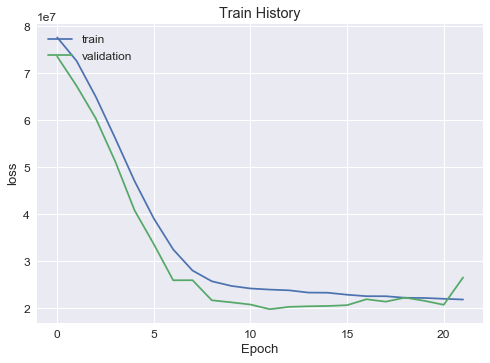

In [147]:
def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title("Train History")
    plt.ylabel(train)
    plt.xlabel("Epoch")
    plt.legend(["train","validation"], loc="upper left")
    plt.show()

#show_train_history(train_history,"mean_absolute_error","val_mean_absolute_error")
show_train_history(train_history,"loss","val_loss")

In [148]:
print("test_mse_score",":",test_mse_score," / ","test_mae_score",":",test_mae_score)

test_mse_score : 19915071.925462447  /  test_mae_score : 2125.029036386061


In [126]:
import xgboost as xgb

In [129]:
params = {
   
    'max_depth': 14,#7
    'gamma' :0,
    'eta':.01, 
    'subsample': 1,
    'colsample_bytree': 0.9, 
    'objective':'reg:linear',
    'eval_metric':'rmse',
    'silent': 0
}

In [130]:
def XGBmodel(x_train,x_test,y_train_label,y_test_label,params):
    matrix_train = xgb.DMatrix(x_train,label=y_train_label)
    matrix_test = xgb.DMatrix(x_test,label=y_test_label)
    model=xgb.train(params=params,
                    dtrain=matrix_train,num_boost_round=300, 
                    early_stopping_rounds=10,evals=[(matrix_test,'test')])
    return model

model = XGBmodel(x_train,x_test,y_train_label,y_test_label,params)

[22:04:18] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 5072 extra nodes, 0 pruned nodes, max_depth=14
[0]	test-rmse:8661.62
Will train until test-rmse hasn't improved in 10 rounds.
[22:04:19] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 5798 extra nodes, 0 pruned nodes, max_depth=14
[1]	test-rmse:8603.34
[22:04:20] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 5604 extra nodes, 0 pruned nodes, max_depth=14
[2]	test-rmse:8539.18
[22:04:22] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 5976 extra nodes, 0 pruned nodes, max_depth=14
[3]	test-rmse:8476.08
[22:04:25] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 5886 extra nodes, 0 pruned nodes, max_depth=14
[4]	test-rmse:8413.67
[22:04:26] C:\Users\Administrator\Desktop\xgboost\src\tree\upda

[22:05:22] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 6424 extra nodes, 0 pruned nodes, max_depth=14
[47]	test-rmse:6374.28
[22:05:23] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 6678 extra nodes, 0 pruned nodes, max_depth=14
[48]	test-rmse:6339.6
[22:05:24] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 6044 extra nodes, 0 pruned nodes, max_depth=14
[49]	test-rmse:6308.65
[22:05:28] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 6472 extra nodes, 0 pruned nodes, max_depth=14
[50]	test-rmse:6274.32
[22:05:29] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 6096 extra nodes, 0 pruned nodes, max_depth=14
[51]	test-rmse:6244.07
[22:05:30] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 6800 extr

[22:06:23] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 6666 extra nodes, 0 pruned nodes, max_depth=14
[94]	test-rmse:5197.09
[22:06:24] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 5978 extra nodes, 0 pruned nodes, max_depth=14
[95]	test-rmse:5181.55
[22:06:25] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 6182 extra nodes, 0 pruned nodes, max_depth=14
[96]	test-rmse:5164.6
[22:06:26] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 5894 extra nodes, 0 pruned nodes, max_depth=14
[97]	test-rmse:5149.26
[22:06:27] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 6604 extra nodes, 0 pruned nodes, max_depth=14
[98]	test-rmse:5133.19
[22:06:28] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 6280 extr

[22:07:25] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 6282 extra nodes, 0 pruned nodes, max_depth=14
[141]	test-rmse:4655.35
[22:07:26] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 7206 extra nodes, 0 pruned nodes, max_depth=14
[142]	test-rmse:4648.01
[22:07:27] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 6560 extra nodes, 0 pruned nodes, max_depth=14
[143]	test-rmse:4641.1
[22:07:28] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 6416 extra nodes, 0 pruned nodes, max_depth=14
[144]	test-rmse:4634.21
[22:07:29] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 7042 extra nodes, 0 pruned nodes, max_depth=14
[145]	test-rmse:4627.38
[22:07:30] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 6586

[22:08:32] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 6220 extra nodes, 0 pruned nodes, max_depth=14
[188]	test-rmse:4429.88
[22:08:33] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 5984 extra nodes, 0 pruned nodes, max_depth=14
[189]	test-rmse:4426.78
[22:08:34] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 6046 extra nodes, 0 pruned nodes, max_depth=14
[190]	test-rmse:4423.98
[22:08:35] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 6000 extra nodes, 0 pruned nodes, max_depth=14
[191]	test-rmse:4421.02
[22:08:36] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 6300 extra nodes, 0 pruned nodes, max_depth=14
[192]	test-rmse:4418.15
[22:08:39] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 574

[22:09:42] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 6422 extra nodes, 0 pruned nodes, max_depth=14
[235]	test-rmse:4330.08
[22:09:44] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 6026 extra nodes, 0 pruned nodes, max_depth=14
[236]	test-rmse:4328.94
[22:09:45] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 5826 extra nodes, 0 pruned nodes, max_depth=14
[237]	test-rmse:4327.97
[22:09:47] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 4236 extra nodes, 0 pruned nodes, max_depth=14
[238]	test-rmse:4326.79
[22:09:48] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 5856 extra nodes, 0 pruned nodes, max_depth=14
[239]	test-rmse:4325.72
[22:09:48] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 585

[22:10:50] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 5864 extra nodes, 0 pruned nodes, max_depth=14
[282]	test-rmse:4296.6
[22:10:51] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 5208 extra nodes, 0 pruned nodes, max_depth=14
[283]	test-rmse:4296.44
[22:10:52] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 5344 extra nodes, 0 pruned nodes, max_depth=14
[284]	test-rmse:4295.95
[22:10:53] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 4956 extra nodes, 0 pruned nodes, max_depth=14
[285]	test-rmse:4295.63
[22:10:54] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 4776 extra nodes, 0 pruned nodes, max_depth=14
[286]	test-rmse:4295.3
[22:10:55] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 4902 

In [107]:
test_df = pd.read_csv('d:/pythondata/testing-set_org.csv')
print("test_df len:",len(test_df))

test_df len: 140510


In [108]:
test_df_merge = pd.merge(all_merg,test_df,left_on=['Policy_Number'],right_on=['Policy_Number'],how='inner')
print("test_df_merge len:",len(test_df_merge))

test_df_merge len: 140510


In [110]:
test_df_merge.describe().T

,count,mean,std,min,25%,50%,75%,max
Cancellation,140510.0,2.062131e-01,4.045867e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
Manafactured_Year_and_Month,140510.0,2.005150e+03,5.737731e+00,1.911000e+03,2.001000e+03,2.005000e+03,2.010000e+03,2.016000e+03
Engine_Displacement_(Cubic_Centimeter),140510.0,1.938636e+03,5.190771e+02,9.000000e+00,1.600000e+03,1.800000e+03,2.000000e+03,6.400000e+03
Imported_or_Domestic_Car,140510.0,1.433775e+01,1.019985e+01,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01,9.000000e+01
qpt,140510.0,4.900754e+00,1.211710e+00,2.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,2.400000e+01
Replacement_cost_of_insured_vehicle,140510.0,8.183443e+01,6.447891e+01,1.000000e+00,5.350000e+01,6.620000e+01,8.580000e+01,8.915000e+03
Multiple_Products_with_TmNewa_(Yes_or_No?),140510.0,8.184222e+00,1.484487e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.083000e+03
lia_class,140510.0,5.292008e-01,2.084528e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,2.000000e+00,1.900000e+01
plia_acc,140510.0,-2.722062e-01,1.936369e-01,-3.800000e-01,-3.800000e-01,-3.800000e-01,-2.000000e-01,4.700000e+00
pdmg_acc,140510.0,-7.963846e-02,1.894987e-01,-6.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,1.200000e+00


In [89]:
test_df_merge['Premium'].describe()

count    140510.000000
mean       6072.833869
std        7673.914892
min           9.000000
25%        2715.000000
50%        3702.000000
75%        6186.000000
max      348658.000000
Name: Premium, dtype: float64

In [127]:
#刪除不要的欄位
test_df_merge = test_df_merge.drop(del_cols,axis=1)
#test_df_merge = test_df_merge[cal_cols]
test_df_merge = test_df_merge.drop(columns='Next_Premium')
#test_df_merge = test_df_merge.drop(['qpt','lia_class','plia_acc','pdmg_acc','fsex','fmarriage'],axis=1)


In [128]:
test_df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140510 entries, 0 to 140509
Data columns (total 28 columns):
Cancellation                                  140510 non-null int64
Engine_Displacement_(Cubic_Centimeter)        140510 non-null int64
Imported_or_Domestic_Car                      140510 non-null int64
qpt                                           140510 non-null float64
Multiple_Products_with_TmNewa_(Yes_or_No?)    140510 non-null float64
lia_class                                     140510 non-null int64
plia_acc                                      140510 non-null float64
pdmg_acc                                      140510 non-null float64
fassured                                      140510 non-null int64
fsex                                          140510 non-null int64
fmarriage                                     140510 non-null int64
ibirthT                                       140510 non-null int64
model1                                        140510 non-null int

In [129]:
test_df_merge = scaler_m.transform(test_df_merge)
test_df_merge[:5]

array([[0.00000000e+00, 4.43620178e-01, 0.00000000e+00, 1.36363636e-01,
        0.00000000e+00, 1.00000000e-01, 1.57480315e-02, 1.30434783e-01,
        0.00000000e+00, 5.00000000e-01, 5.00000000e-01, 4.67391304e-01,
        5.70370370e-01, 8.32922318e-01, 5.48561394e-01, 8.07780320e-01,
        0.00000000e+00, 6.57962930e-03, 2.94117647e-01, 7.12792491e-03,
        9.03137028e-02, 1.16054573e-02, 1.27709398e-01, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 1.05263158e-01, 1.00000000e+00],
       [0.00000000e+00, 3.54599407e-01, 0.00000000e+00, 1.36363636e-01,
        0.00000000e+00, 1.00000000e-01, 1.57480315e-02, 4.34782609e-02,
        0.00000000e+00, 1.00000000e+00, 5.00000000e-01, 5.10869565e-01,
        5.70370370e-01, 8.94081381e-01, 4.65622045e-01, 2.21967963e-01,
        0.00000000e+00, 3.47431856e-02, 3.52941176e-01, 4.25009681e-02,
        7.09515116e-02, 3.98199316e-03, 4.00686707e-02, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 6.31578947e-02, 1.00000

In [138]:
prediction = model.predict(xgb.DMatrix(test_df_merge), ntree_limit = model.best_ntree_limit).tolist()

In [130]:
pred = model.predict(test_df_merge)
test_df['Next_Premium'] = pred

In [131]:
test_df.loc[test_df['Next_Premium'] < 0 ,'Next_Premium'] = 0

In [132]:
len(test_df[test_df['Next_Premium'] == 0 ] )/len(test_df)

0.015856522667425807

In [133]:
test_df.describe()

,Next_Premium
count,140510.000000
mean,4365.164551
std,5436.307129
min,0.000000
25%,1798.100525
50%,2677.564453
75%,4812.498291
max,203897.609375


In [137]:
test_df_merge['Premium'].describe()

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [136]:
test_df.to_csv("d:/pythondata/testing-set.csv",index=False)

In [139]:
prediction[0:5]

[3532.934814453125,
 16035.73828125,
 47.52151870727539,
 2749.6552734375,
 3439.668212890625]

In [140]:
test_df['Next_Premium'] = prediction

In [141]:
test_df.loc[test_df['Next_Premium'] < 0 ]

,Policy_Number,Next_Premium
17,5af4b78dbae18ae56380217a372e2759bc4df20f,-0.822193
18,71ef3d5fe19281e891d63f35304d40876d519291,-1.406160
19,e8e810178b0268cb8409ee4172e6e8230158e390,-1.406160
240,778230b3b1fed19be5abc1c1c8e4dc6f2ee1bd93,-1.240502
386,b317dabdb2f7bd239dde9d289bb8f6e809cc8d74,-0.447080
459,3d1d1d37d334f28ca8c960b1bf0cbc417b3e2640,-12.906804
496,3482cf1c637b263f5f393a3d306fff156348c501,-3.072998
649,3b99dcf52fcc6401c7c4e90120934ef68d943fff,-1.198780
696,6be6658754c43e27dc6e8db93f03128a4c57cb80,-4.788742
710,31fa1660d5587e8735584afbfd4e8840da18eaa7,-0.060767


In [142]:
test_df.loc[test_df['Next_Premium'] < 0 ,'Next_Premium'] = 0

In [143]:
test_df.describe()

,Next_Premium
count,140510.000000
mean,4280.512588
std,4701.509043
min,0.000000
25%,1992.905701
50%,2901.591309
75%,4790.064941
max,173853.734375


In [144]:
test_df.to_csv("d:/pythondata/testing-set.csv",index=False)

In [93]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from sklearn import svm

from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score
from sklearn.cross_validation import cross_val_score

from sklearn.pipeline import Pipeline


In [102]:
tree = DecisionTreeClassifier(criterion='entropy',max_depth=3,random_state=1)

In [103]:
tree.fit(x_train,y_train_label)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')

In [104]:
crossed = cross_val_score(tree, x_train,y_train_label, cv=10)
print('cross_val_score: {}'.format(crossed),' / mean', crossed.mean())

cross_val_score: [0.81930429 0.81651431 0.82001662 0.81526772 0.81626595 0.81561294
 0.81650341 0.81531612 0.81756115 0.81833294]  / mean 0.8170695446194982


In [105]:
tree.score(x_test,y_test_label)

0.8219552157291098

In [106]:
y2_model = tree.predict(test_df_merge)

In [109]:
test_df_merge['NextYN'] = y2_model

In [78]:
x_df_tmp = train_df_merge[cal_cols]
#y_df = train_df_merge['Next_Premium']
y_df = train_df_merge['NextYN']

In [ ]:
scaler_m = preprocessing.MinMaxScaler()
x_df = scaler_m.fit_transform(x_df_tmp)

In [79]:
scaler_s = preprocessing.StandardScaler()
x_df = scaler_s.fit_transform(x_df_tmp)

In [80]:
x_train, x_test,  y_train_label, y_test_label = train_test_split(x_df,y_df, random_state=5,train_size=0.8, test_size=0.2)

In [ ]:
pipetree = Pipeline([('tree',DecisionTreeClassifier(criterion='entropy',max_depth=7))])
pipeforest = Pipeline([('forest tree',RandomForestClassifier(criterion='entropy'))])
pipegsnb = Pipeline([('GSNB',GaussianNB())])
pipesvm = Pipeline([('svg',svm.SVC())])
pipeknn = Pipeline([('knn',KNeighborsClassifier(n_neighbors=2))])
#pipeknnstd = Pipeline([('std',preprocessing.StandardScaler()),('tree',decision_tree)])
#pipeknnnor = Pipeline([('nor',preprocessing.MinMaxScaler()),('tree',decision_tree)])

pipelines = [pipetree,pipeforest,pipegsnb,pipesvm,pipeknn]
pipenames = {0:'tree',1:'forest tree',2:'GSNB',3:'svg',4:'KNN'}
for i,pipe in enumerate(pipelines):
    pipe.fit(x_train,y_train_label)
    print("Model , feature = %s , accuracy_score : %.2f" % (pipenames[i],pipe.score(x_test,y_test_label)))
    crossed = cross_val_score(pipe, x_train,y_train_label, cv=10)
    print('cross_val_score: {}'.format(crossed),' / mean', crossed.mean())
    print('-'*40)   

Model , feature = tree , accuracy_score : 0.82
cross_val_score: [0.81847323 0.82161938 0.82156001 0.82132257 0.8212526  0.82166815
 0.82054022 0.82255862 0.81946094 0.82082641]  / mean 0.8209282120044861
----------------------------------------
Model , feature = forest tree , accuracy_score : 0.79
cross_val_score: [0.78475603 0.78695239 0.79039535 0.79045471 0.78830514 0.78943307
 0.79073909 0.79062036 0.79102351 0.7882332 ]  / mean 0.7890912834564426
----------------------------------------
Model , feature = GSNB , accuracy_score : 0.77
cross_val_score: [0.76279235 0.76492936 0.76665084 0.76308916 0.76117542 0.76265954
 0.76313446 0.76366874 0.76816671 0.76614818]  / mean 0.764241477311829
----------------------------------------


In [ ]:
y2_model = decision_tree.predict(X2)

In [300]:
from sklearn.metrics import median_absolute_error

In [301]:
median_absolute_error(train_df_merge['Premium'], train_df_merge['Next_Premium'])

464.0

In [302]:
train_df_merge['Premium'].describe()

count    210565.000000
mean       6952.489934
std        9585.552621
min           4.000000
25%        2704.000000
50%        3948.000000
75%        7469.000000
max      627091.000000
Name: Premium, dtype: float64

In [303]:
train_df_merge['Next_Premium'].describe()

count    210565.000000
mean       5081.057369
std        7235.049289
min           0.000000
25%        1499.000000
50%        3305.000000
75%        6212.000000
max      286891.000000
Name: Next_Premium, dtype: float64

In [309]:
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.pipeline import Pipeline
from keras.layers import BatchNormalization

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [333]:
scaler_m = preprocessing.MinMaxScaler()
x_df = scaler_m.fit_transform(x_df_t)
y_df = train_df_merge['Next_Premium']

In [374]:
scaler_s = preprocessing.StandardScaler()
x_df = scaler_s.fit_transform(x_df_t)
y_df = train_df_merge['Next_Premium']

In [340]:
#x_df = x_df_t.copy()
#y_df = train_df_merge['Next_Premium']

In [370]:
def baseline_model():
    # create model
    model = Sequential()
    
    model.add(Dense(32, input_dim=x_df.shape[1], kernel_initializer='normal', activation='relu'))
    #model.add(BatchNormalization())
    
    model.add(Dense(1, kernel_initializer='normal', activation='relu'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])
    return model

In [371]:
estimator = KerasRegressor(build_fn=baseline_model, nb_epoch=50, batch_size=64, verbose=2)

In [372]:
kfold = KFold(n_splits=10, random_state=7)
results = cross_val_score(estimator, x_df, y_df, cv=kfold)
print("Results: %.2f (%.2f) MSE" % (results.mean(), results.std()))
#Results: -63888571.64 (9481728.37) MSE -minmax
#Results: -55315245.12 (8709382.44) MSE -st
#-55429061.76 (8870070.43) MSE -st  nb_epoch=100
#-55368557.01 (8542030.63) MSE

Epoch 1/1
Epoch 1/1
Epoch 1/1
Epoch 1/1
Epoch 1/1
Epoch 1/1
Epoch 1/1
Epoch 1/1
Epoch 1/1
Epoch 1/1
Results: -55368557.01 (8542030.63) MSE


In [375]:
x_train, x_test,  y_train_label, y_test_label = train_test_split(x_df,y_df, random_state=5,train_size=0.8, test_size=0.2)

In [376]:
print("Train data=", len(x_train))
print("Test data=", len(x_test))

print("The Shpae of x_train : ", x_train.shape)
print("The Shpae of y_train_label : ", y_train_label.shape)
print("The Shpae of x_train : ", x_test.shape)
print("The Shpae of y_train_label : ", y_test_label.shape)

Train data= 168452
Test data= 42113
The Shpae of x_train :  (168452, 14)
The Shpae of y_train_label :  (168452,)
The Shpae of x_train :  (42113, 14)
The Shpae of y_train_label :  (42113,)


In [386]:
from keras import optimizers
from keras import callbacks

In [417]:
# 64    test_mse_score : 19445638.129045803  /  test_mae_score : 2186.661455343872
# 32    test_mse_score : 19785174.871090874  /  test_mae_score : 2190.872207093397
# 32/8  test_mse_score : 19080754.236413043  /  test_mae_score : 2029.9756969263221
# 32/16 test_mse_score : 20015325.58708935  /  test_mae_score : 2098.3118879643293
# 64/16 test_mse_score : 18956458.914327227  /  test_mae_score : 2134.56545302153
# 64/16/8 test_mse_score : 21629814.754343595  /  test_mae_score : 2216.491860956914
# 64/8 test_mse_score : 18777275.505995773  /  test_mae_score : 2167.0880553661523

def build_model():
    model = Sequential()
    
    #normal
    model.add(Dense(64, activation='relu', kernel_initializer="normal",input_dim=x_train.shape[1]))
    model.add(BatchNormalization())
    
    #model.add(Dense(16, activation='relu'))
    #model.add(BatchNormalization())
    
    model.add(Dense(8, activation='relu'))
    model.add(BatchNormalization())

    model.add(Dense(1, activation='relu'))
    
    #model.add(layers.Dense(64, activation='relu'))
    #model.add(BatchNormalization())
    #model.add(layers.Dense(1,activation='linear'))
    # keras.losses.mean_absolute_error
    adam = optimizers.adam(lr=0.001) #0.001
    #adam = optimizers.rmsprop(lr=0.001)
    model.compile(loss='mse', optimizer=adam, metrics=['mae'])
    #model.compile(optimizer='adam', loss='mae', metrics=['mae'])
    # early = EarlyStopping(monitor='val_loss', patience=15, mode='min')
    return model

In [418]:
# https://hk.saowen.com/a/b7630cba0092c675145cd6c52595731a7566087e2c9b945f4da491c3bebe5de5
# https://www.kaggle.com/apapiu/regularized-linear-models

In [419]:
#x_train, x_test,  y_train_label, y_test_label
# Get a fresh, compiled model.
model = build_model()

early_stop = callbacks.EarlyStopping(monitor='val_loss', patience=10,mode='min')
 
# Train it on the entirety of the data.
train_history = model.fit(x_train, y_train_label,
          epochs=100, batch_size=64, verbose=2, validation_split=0.2,callbacks=[early_stop])
test_mse_score, test_mae_score = model.evaluate(x_test, y_test_label)

Train on 134761 samples, validate on 33691 samples
Epoch 1/100
 - 19s - loss: 77414637.7667 - mean_absolute_error: 5047.4053 - val_loss: 77460657.8949 - val_mean_absolute_error: 5122.9456
Epoch 2/100
 - 13s - loss: 74783030.6144 - mean_absolute_error: 4967.2621 - val_loss: 73563406.9084 - val_mean_absolute_error: 5002.2768
Epoch 3/100
 - 13s - loss: 70606819.4879 - mean_absolute_error: 4831.9266 - val_loss: 68702880.5899 - val_mean_absolute_error: 4845.1606
Epoch 4/100
 - 14s - loss: 65389253.0502 - mean_absolute_error: 4652.4167 - val_loss: 63154937.7031 - val_mean_absolute_error: 4652.6253
Epoch 5/100
 - 13s - loss: 59496113.4786 - mean_absolute_error: 4433.6277 - val_loss: 58273079.3637 - val_mean_absolute_error: 4431.3952
Epoch 6/100
 - 13s - loss: 53260149.9468 - mean_absolute_error: 4180.3027 - val_loss: 49069728.6180 - val_mean_absolute_error: 4097.8106
Epoch 7/100
 - 13s - loss: 47048551.7273 - mean_absolute_error: 3897.6479 - val_loss: 42932928.7739 - val_mean_absolute_error: 

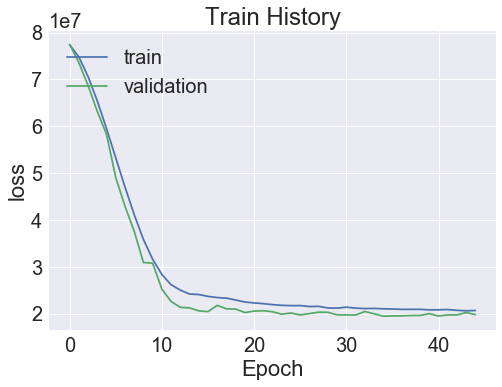

In [420]:
def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title("Train History")
    plt.ylabel(train)
    plt.xlabel("Epoch")
    plt.legend(["train","validation"], loc="upper left")
    plt.show()

#show_train_history(train_history,"mean_absolute_error","val_mean_absolute_error")
show_train_history(train_history,"loss","val_loss")

In [421]:
print("test_mse_score",":",test_mse_score," / ","test_mae_score",":",test_mae_score)

test_mse_score : 18777275.505995773  /  test_mae_score : 2167.0880553661523


In [190]:
#median_absolute_error(y_test_label_v, pred_test)

1050.437744140625

In [ ]:
#==========================================================#

In [427]:
test_df = pd.read_csv('d:/pythondata/testing-set_org.csv')
print("test_df len:",len(test_df))

test_df len: 140510


In [428]:
test_df_merge = pd.merge(all_merg,test_df,left_on=['Policy_Number'],right_on=['Policy_Number'],how='inner')
print("test_df_merge len:",len(test_df_merge))

test_df_merge len: 140510


In [429]:
test_df_merge.head()

,Policy_Number,Insured's_ID,Prior_Policy_Number,Cancellation,Vehicle_identifier,Vehicle_Make_and_Model1,Vehicle_Make_and_Model2,Manafactured_Year_and_Month,Engine_Displacement_(Cubic_Centimeter),Imported_or_Domestic_Car,...,Insurance_Coverage,pca_premium,pca_amount1,pca_amount2,pca_amount3,Amount,Deductible,Claim_Number,Car_Age,Next_Premium
0,21a42238c333ad57d0f8a1560c75ecd614e9e537,Hbe4e43a20822f6fda8c715a3ca9ec6d7400d2139,a46e38e55355b3402c0eb075d57fd8eef5bfbab1,0,5463a0d1ba1c88d5f5dff5c4457706c32b0df864,9e1816a8c2a63b7f96a82ce6487b2d43222750db,d61dbc294b737aaba69a15cc7ccaa33027ab3f1f,2006,3000,10,...,6,-739.235415,-2.293773e+05,-239409.544931,8.492047e+06,0.0,0.0,0.0,10,100
1,ce5b9a53317a385ec30c4ecbd0b7b7eec3986a53,Radc363453bbde05b6b7c04f8b88a7e0545d96a4c,156da6d558816bc600786ceb386fd491bc4e161b,0,926223b59e1a57526af9d7e8d210d52094178b71,9e1816a8c2a63b7f96a82ce6487b2d43222750db,e59ef193ac9c28416e20dd6151d278498658254f,2010,2400,10,...,7,17300.763692,-7.107991e+05,-381717.004370,-1.303141e+07,0.0,0.0,0.0,6,100
2,6796b993947fdf4459f864a508bed08d0bd890f7,2d46eabfa1e6a64c57a71bbf67049c4f639252766,NaN,1,40e2c7182412df67e679f3dc88d3c1b95b423a87,960d139497003852038c328303d92f423e6854c4,157782cf630148b07ade09f0806c06caeb494741,2008,1198,10,...,2,-727.282895,-2.157137e+06,-453921.802963,-1.659101e+07,0.0,0.0,0.0,8,100
3,eed9dae63afca093472c1a7d6e9fb13f518f86bb,E3984e4337e0bb918fb21c960ed2072b8be4d5664,909fd30f44eaceb6d870ab64751bf3d8ff2267ad,0,431d6b9430ec68c94f8a6dde0bd7737878317ced,07cc52e3bb158ac37b22350e0a6c5804d3b74f1a,68f228098f3362d552e782cc7cd85342e8f7da46,2004,1598,10,...,4,-788.289221,-1.192915e+06,-453921.802963,-5.077229e+06,0.0,0.0,0.0,12,100
4,262ab98ec3d6a0e735e8eac151200ab11eb5d61d,U346bec93aaf7e1fb6b34bded5fb588272fb974f3,7051ac128ae988da16993b514676e819ffc459eb,0,aa3b6ed2f8829a15cb21a6ddd2b0cec06d131e57,9e1816a8c2a63b7f96a82ce6487b2d43222750db,f2c6b2855867c303e78cccaf8a23d55df5fd672e,2004,1781,10,...,6,-754.915689,2.752452e+06,-231131.841913,-6.047061e+06,0.0,0.0,0.0,12,100


In [425]:
test_df_merge['Premium'].describe()

count    140510.000000
mean       6072.833869
std        7673.914892
min           9.000000
25%        2715.000000
50%        3702.000000
75%        6186.000000
max      348658.000000
Name: Premium, dtype: float64

In [430]:
#刪除不要的欄位
test_df_merge = test_df_merge.drop(del_cols,axis=1)
test_df_merge = test_df_merge[cols]
test_df_merge = test_df_merge.drop(columns='Next_Premium')
#test_df_merge = test_df_merge.drop(['qpt','lia_class','plia_acc','pdmg_acc','fsex','fmarriage'],axis=1)
test_df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140510 entries, 0 to 140509
Data columns (total 14 columns):
Premium                                   140510 non-null int64
pca_premium                               140510 non-null float64
Insurance_Coverage                        140510 non-null int64
pca_amount1                               140510 non-null float64
Engine_Displacement_(Cubic_Centimeter)    140510 non-null int64
Imported_or_Domestic_Car                  140510 non-null int64
pca_amount3                               140510 non-null float64
lia_class                                 140510 non-null int64
plia_acc                                  140510 non-null float64
fassured                                  140510 non-null int64
Claim_Number                              140510 non-null float64
Amount                                    140510 non-null float64
Cancellation                              140510 non-null int64
pca_amount2                               140

In [431]:
test_df_merge = scaler_s.transform(test_df_merge)
test_df_merge[:5]

array([[-0.2944532 , -0.15719788,  0.3898289 , -0.12038333,  1.83865385,
        -0.47261036,  0.57717883,  0.20586407, -0.15361876, -0.45262979,
        -0.26571237, -0.09531032, -0.48671683, -0.10523801],
       [ 1.54801146,  3.41197249,  0.77281172, -0.41926676,  0.75092309,
        -0.47261036, -0.75105229,  0.20586407, -0.15361876, -0.45262979,
        -0.26571237, -0.09531032, -0.48671683, -0.17876703],
       [-0.10374908, -0.1548331 , -1.14210235, -1.31720392, -1.42816419,
        -0.47261036, -0.97071803,  1.15843664,  0.84213723,  2.16155617,
        -0.26571237, -0.09531032,  2.05458274, -0.21607462],
       [-0.39418686, -0.16690305, -0.37613672, -0.71858118, -0.70301035,
        -0.47261036, -0.26019276, -0.7467085 , -0.55192116, -0.45262979,
        -0.26571237, -0.09531032, -0.48671683, -0.21607462],
       [-0.32376822, -0.16030018,  0.3898289 ,  1.73083999, -0.37125247,
        -0.47261036, -0.3200419 , -0.7467085 , -0.55192116, -0.45262979,
        -0.26571237, -0.09

In [432]:
pred = model.predict(test_df_merge)
test_df['Next_Premium'] = pred

In [433]:
test_df.loc[test_df['Next_Premium'] < 0 ]

,Policy_Number,Next_Premium


In [197]:
test_df.loc[test_df['Next_Premium'] < 0 ,'Next_Premium'] = 0

In [206]:
a = (1765/140510)*100
a

1.256138353142125

In [434]:
len(test_df[test_df['Next_Premium'] == 0 ] )/len(test_df)

0.03195502099494698

In [209]:
b = (46210/len(train_df))*100
b

21.925100705531804

In [435]:
#none
test_df.describe()

,Next_Premium
count,140510.000000
mean,4266.666992
std,4513.439453
min,0.000000
25%,2168.346680
50%,2940.651855
75%,4633.896118
max,137139.593750


In [436]:
test_df.to_csv("d:/pythondata/testing-set.csv",index=False)

In [ ]:
#==========================================================#

In [439]:
#!pip install xgboost

In [440]:
import xgboost as xgb

In [444]:
dtrain = xgb.DMatrix(x_df, label = y_df)
dtest = xgb.DMatrix(test_df_merge)

params = {"max_depth":5, "eta":0.1}
model_xgb = xgb.cv(params, dtrain,  num_boost_round=500, early_stopping_rounds=100)

[21:54:05] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[21:54:06] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=5
[21:54:06] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=5
[21:54:06] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[21:54:07] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=5
[21:54:07] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=5
[21:54:07] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning e

[21:54:25] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[21:54:26] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=5
[21:54:26] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[21:54:27] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[21:54:27] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[21:54:27] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[21:54:28] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning e

[21:54:42] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 0 pruned nodes, max_depth=5
[21:54:42] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 0 pruned nodes, max_depth=5
[21:54:42] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 0 pruned nodes, max_depth=5
[21:54:42] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 38 extra nodes, 0 pruned nodes, max_depth=5
[21:54:43] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[21:54:43] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 0 pruned nodes, max_depth=5
[21:54:43] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning e

[21:55:11] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 0 pruned nodes, max_depth=5
[21:55:11] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 0 pruned nodes, max_depth=5
[21:55:11] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 52 extra nodes, 0 pruned nodes, max_depth=5
[21:55:11] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 52 extra nodes, 0 pruned nodes, max_depth=5
[21:55:11] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[21:55:12] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 52 extra nodes, 0 pruned nodes, max_depth=5
[21:55:12] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning e

[21:55:25] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 52 extra nodes, 0 pruned nodes, max_depth=5
[21:55:26] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 0 pruned nodes, max_depth=5
[21:55:26] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 0 pruned nodes, max_depth=5
[21:55:26] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 36 extra nodes, 0 pruned nodes, max_depth=5
[21:55:26] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 0 pruned nodes, max_depth=5
[21:55:27] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 0 pruned nodes, max_depth=5
[21:55:27] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning e

[21:55:38] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=5
[21:55:38] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 42 extra nodes, 0 pruned nodes, max_depth=5
[21:55:39] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 0 pruned nodes, max_depth=5
[21:55:39] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 0 pruned nodes, max_depth=5
[21:55:39] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 0 pruned nodes, max_depth=5
[21:55:39] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 0 pruned nodes, max_depth=5
[21:55:40] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning e

[21:55:51] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 0 pruned nodes, max_depth=5
[21:55:51] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 42 extra nodes, 0 pruned nodes, max_depth=5
[21:55:53] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 42 extra nodes, 0 pruned nodes, max_depth=5
[21:55:54] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 0 pruned nodes, max_depth=5
[21:55:55] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 42 extra nodes, 0 pruned nodes, max_depth=5
[21:55:56] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[21:55:56] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning e

[21:56:14] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 46 extra nodes, 0 pruned nodes, max_depth=5
[21:56:14] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 32 extra nodes, 0 pruned nodes, max_depth=5
[21:56:14] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 0 pruned nodes, max_depth=5
[21:56:15] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 0 pruned nodes, max_depth=5
[21:56:15] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 0 pruned nodes, max_depth=5
[21:56:15] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 0 pruned nodes, max_depth=5
[21:56:15] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning e

[21:56:31] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=5
[21:56:31] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 0 pruned nodes, max_depth=5
[21:56:32] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=5
[21:56:32] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 0 pruned nodes, max_depth=5
[21:56:32] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 46 extra nodes, 0 pruned nodes, max_depth=5
[21:56:32] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 52 extra nodes, 0 pruned nodes, max_depth=5
[21:56:33] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning e

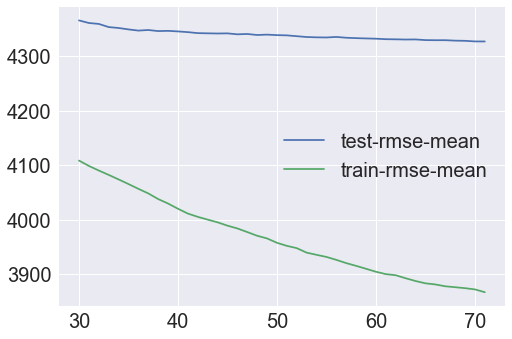

In [445]:
model_xgb.loc[30:,["test-rmse-mean", "train-rmse-mean"]].plot()

In [ ]:
#==========================================================#
#https://www.coursera.org/lecture/machine-learning/features-and-polynomial-regression-Rqgfz

In [446]:
from sklearn.linear_model import LinearRegression,Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
from sklearn.model_selection import cross_val_score

In [454]:
print("Find most important features relative to target")
corr = train_df_merge.corr()
corr.sort_values(["Next_Premium"], ascending = False, inplace = True)
print(corr.Next_Premium)

Find most important features relative to target
Next_Premium                                  1.000000
Premium                                       0.768529
Insurance_Coverage                            0.478493
pca_premium                                   0.459482
NextYN                                        0.372383
pca_amount1                                   0.304283
Engine_Displacement_(Cubic_Centimeter)        0.241079
pca_amount3                                   0.226567
Imported_or_Domestic_Car                      0.191158
fassured                                      0.182887
Claim_Number                                  0.174104
lia_class                                     0.140213
plia_acc                                      0.137358
pca_amount2                                   0.091396
Amount                                        0.089964
Cancellation                                  0.034560
Deductible                                    0.031936
Multiple_Products

In [460]:
model_line = LinearRegression(fit_intercept=False)
#model_line.fit(x_train, y_train_label)
print(cross_val_score(model_line, x_df, y_df,cv=10,scoring='neg_mean_absolute_error').mean())  

-5791.270756677087


In [461]:
model_rige = Ridge()
print(cross_val_score(model_rige, x_df, y_df,cv=10,scoring='neg_mean_absolute_error').mean())  

-2218.6534718062967


In [462]:
model_en = ElasticNet()
print(cross_val_score(model_en, x_df, y_df,cv=10,scoring='neg_mean_absolute_error').mean())  

-2442.9644655154175


In [ ]:
model_RidgeCV = RidgeCV()

In [ ]:
model_rige

In [ ]:
RidgeCV, ElasticNet, LassoCV, LassoLarsCV
#==========================================================#

In [106]:
from sklearn.linear_model import LinearRegression

In [108]:
model_line = LinearRegression(fit_intercept=False)
model_line.fit(x_train, y_train_label)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=1, normalize=False)

In [112]:
test_pre = model_line.predict(x_test)

In [110]:
va = pd.DataFrame()
va['lable_org'] = y_test_label

In [113]:
va['lable_pre'] = test_pre

In [115]:
va['lable_org'].mean()

5088.188408891419

In [116]:
va['lable_pre'].mean()

-23.944400194656684

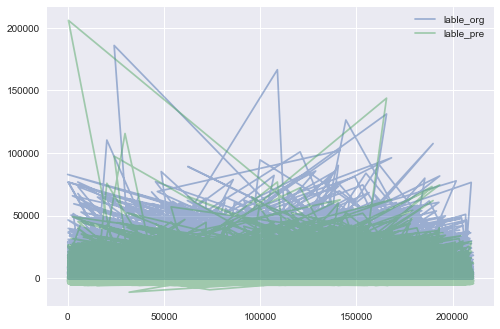

In [114]:
va[['lable_org', 'lable_pre']].plot(alpha=0.5);

In [96]:
test_df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140510 entries, 0 to 140509
Data columns (total 18 columns):
Prior_Policy_Number                           140510 non-null int64
Cancellation                                  140510 non-null int64
Engine_Displacement_(Cubic_Centimeter)        140510 non-null int64
Imported_or_Domestic_Car                      140510 non-null int64
qpt                                           140510 non-null float64
Multiple_Products_with_TmNewa_(Yes_or_No?)    140510 non-null float64
lia_class                                     140510 non-null int64
plia_acc                                      140510 non-null float64
pdmg_acc                                      140510 non-null float64
fassured                                      140510 non-null int64
fsex                                          140510 non-null int64
fmarriage                                     140510 non-null int64
Premium                                       140510 non-null int

In [97]:
test_df_merge.head()

,Prior_Policy_Number,Cancellation,Engine_Displacement_(Cubic_Centimeter),Imported_or_Domestic_Car,qpt,Multiple_Products_with_TmNewa_(Yes_or_No?),lia_class,plia_acc,pdmg_acc,fassured,fsex,fmarriage,Premium,Insurance_Coverage,Amount,Deductible,Claim_Number,Car_Age
0,1,0,3000,10,5.0,0.0,1,-0.30,0.0,1,1,1,4130,6,0.0,0.0,0.0,10
1,1,0,2400,10,5.0,0.0,1,-0.30,-0.4,1,2,1,21791,7,0.0,0.0,0.0,6
2,1,1,1198,10,2.0,0.0,3,-0.10,0.0,2,0,0,5958,2,0.0,0.0,0.0,8
3,1,0,1598,10,5.0,0.0,-1,-0.38,0.0,1,2,1,3174,4,0.0,0.0,0.0,12
4,1,0,1781,10,5.0,0.0,-1,-0.38,0.0,1,1,1,3849,6,0.0,0.0,0.0,12


In [99]:
test_df_merge = scaler.transform(test_df_merge)

In [117]:
pred = model_line.predict(test_df_merge)

In [152]:
test_df.to_csv("d:/pythondata/testing-set.csv",index=False)

In [153]:
#============= end =============================================#